In [1]:
import geemap
import ee

# Initialize Earth Engine
ee.Initialize()

# Create a geemap object
Map = geemap.Map()

# Define bounding boxes based on your data
surface_bounding_box = ee.Geometry.Rectangle([min([42.50, 40.50, 46.50, 43.25, 54.50]), 
                                              min([16.00, 20.75, 30.25, 21.75, 29.75]), 
                                              max([42.50, 40.50, 46.50, 43.25, 54.50]), 
                                              max([16.00, 20.75, 30.25, 21.75, 29.75])])

merra_bounding_box = ee.Geometry.Rectangle([min([36.0625, 51.6875, 49.8125, 41.6875, 37.3125]), 
                                            min([14.25, 15.25, 26.25, 27.25, 14.75]), 
                                            max([36.0625, 51.6875, 49.8125, 41.6875, 37.3125]), 
                                            max([14.25, 15.25, 26.25, 27.25, 14.75])])

# Add the bounding boxes to the map
Map.addLayer(surface_bounding_box, {'color': 'blue'}, 'Surface Data Bounding Box')
Map.addLayer(merra_bounding_box, {'color': 'red'}, 'MERRA-2 Data Bounding Box')

# Center the map on the surface bounding box and set zoom level
Map.centerObject(surface_bounding_box, 5)

# Display the map
Map


Map(center=[23.148926676955387, 47.49999999999999], controls=(WidgetControl(options=['position', 'transparent_…


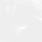

In [3]:
import folium
import rasterio
from folium.raster_layers import ImageOverlay

# Create a folium map object instead of geemap
Map = folium.Map(location=[21.0, 45.0], zoom_start=5)

# Add bounding boxes to the map using folium's Rectangle
folium.Rectangle(bounds=[[min([16.00, 20.75, 30.25, 21.75, 29.75]), min([42.50, 40.50, 46.50, 43.25, 54.50])],
                         [max([16.00, 20.75, 30.25, 21.75, 29.75]), max([42.50, 40.50, 46.50, 43.25, 54.50])]],
                color='blue', fill=True, fill_opacity=0.2, popup='Surface Data Bounding Box').add_to(Map)

folium.Rectangle(bounds=[[min([14.25, 15.25, 26.25, 27.25, 14.75]), min([36.0625, 51.6875, 49.8125, 41.6875, 37.3125])],
                         [max([14.25, 15.25, 26.25, 27.25, 14.75]), max([36.0625, 51.6875, 49.8125, 41.6875, 37.3125])]],
                color='red', fill=True, fill_opacity=0.2, popup='MERRA-2 Data Bounding Box').add_to(Map)

# Add the local GeoTIFF image
with rasterio.open(r"Z:\Thesis\Data\GEE\MERRA2_aer\AOD_ducmass\1987\1987010114.tif") as src:
    bounds = src.bounds
    image = src.read(1)  # Read the first band of the image

# Overlay the GeoTIFF image using folium's ImageOverlay
img_overlay = ImageOverlay(
    image=image,
    bounds=[[bounds.bottom, bounds.left], [bounds.top, bounds.right]],
    opacity=0.6
)

# Add the image overlay to the map
img_overlay.add_to(Map)

# Display the map
Map



In [5]:
import geemap
import ee

# Initialize Earth Engine
ee.Initialize()

# Create a geemap object
Map = geemap.Map()

# Define the MERRA-2 image from Earth Engine after ingestion
merra_image = ee.Image(r"Z:\Thesis\Data\GEE\MERRA2_aer\AOD_ducmass\1987\1987010114.tif")

# Overlay the image
Map.addLayer(merra_image, {'min': 0, 'max': 1, 'palette': ['blue', 'green', 'red']}, 'MERRA-2 Image')

# Display the map
Map


EEException: Image.load: Image asset 'Z:\Thesis\Data\GEE\MERRA2_aer\AOD_ducmass\1987\1987010114.tif' not found (does not exist or caller does not have access).